# Mini-project \#2 (RNN exercise)

## Task: Weather prediction

## Jena climate dataset

This dataset is prepared by <a href="https://www.bgc-jena.mpg.de" class="external">Max Planck Institute for Biogeochemistry</a>. It is measured in Jena, Germany, from Jan. 10 2009 to December 31 2016.

## Loading Jena climate dataset

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('jena_climate_2009_2016.csv')
data.info()

FileNotFoundError: [Errno 2] No such file or directory: 'jena_climate_2009_2016.csv'

### Temperatures
`T (degC)`: Temperature in Celsius \
`Tpot (K)`: Temperature in Kelvin

### Others
`p (mbar)`: The pascal SI derived unit of pressure \
`Tdew (degC)`: Temperature in Celsius relative to humidity (이슬점)\
`rh (%)`: Relative humidity is a measure of how saturated the air is with waver vapor (상대습도) \
`VPmax (mbar)`: Saturation vapor pressure (포화증기압) \
`VPact (mbar)`: Vapor pressure (증기압) \
`VPdef (mbar)`: Vapor pressure deficit \
`sh (g/kg)`: Specific humidity (비습도) \
`H2OC (mmol/mol)`: Water vapor concentration (수증기농도) \
`rho (g/m**3)`: Airtight \
`wv (m/s)`: Wind speed \
`max. wv (m/s)`: Maximimum wind speed \
`wd (deg)`: Wind direction in degrees

In [ ]:
# Look up the first five examples
data.head(5)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


## Data visualization: Temperature in celsius

In [ ]:
T_data = data['T (degC)']
date_time = pd.to_datetime(data['Date Time'],format='%d.%m.%Y %H:%M:%S')

In [ ]:
print(T_data)
print(T_data.shape)
print(date_time)

0        -8.02
1        -8.41
2        -8.51
3        -8.31
4        -8.27
          ... 
420546   -4.05
420547   -3.35
420548   -3.16
420549   -4.23
420550   -4.82
Name: T (degC), Length: 420551, dtype: float64
(420551,)
0        2009-01-01 00:10:00
1        2009-01-01 00:20:00
2        2009-01-01 00:30:00
3        2009-01-01 00:40:00
4        2009-01-01 00:50:00
                 ...        
420546   2016-12-31 23:20:00
420547   2016-12-31 23:30:00
420548   2016-12-31 23:40:00
420549   2016-12-31 23:50:00
420550   2017-01-01 00:00:00
Name: Date Time, Length: 420551, dtype: datetime64[ns]


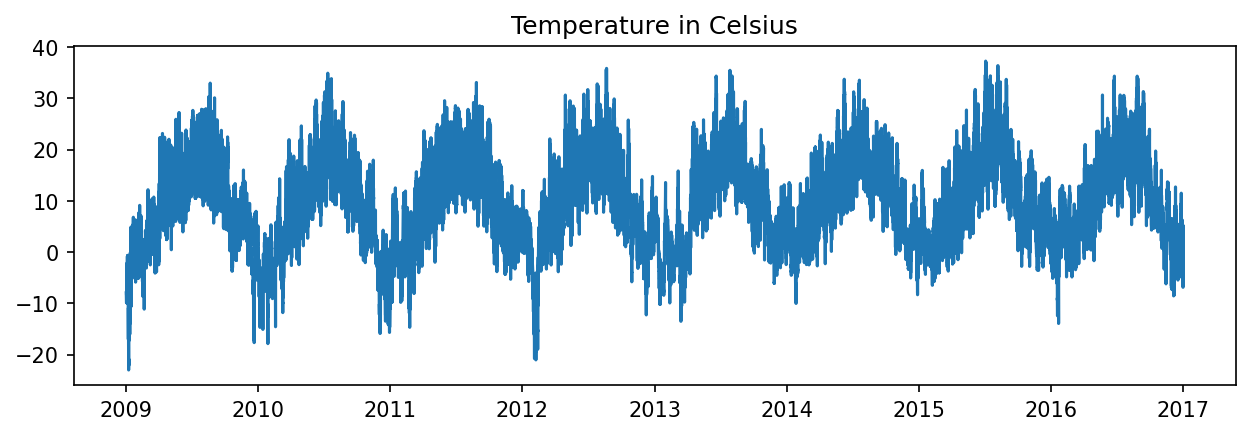

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3), dpi=150)
plt.plot(date_time, T_data)
plt.title('Temperature in Celsius')
plt.show()

## Correlation analysis

We employ Pearson correlation defined as:
\begin{align*}
\rho_{ij} := \frac{ {\sf Cov} (x_i,x_j) }{ \sqrt{{\sf Var}(x_i) {\sf Var}(x_j)} }.
\end{align*}
It is in between -1 and 1.



In [ ]:
data.corr()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
p (mbar),1.000000,-0.045375,-0.124718,-0.066755,-0.018352,-0.031546,-0.054370,-0.003401,-0.069762,-0.069804,0.307640,-0.005701,-0.007760,-0.063258
T (degC),-0.045375,1.000000,0.996827,0.895708,-0.572416,0.951113,0.867673,0.761744,0.866755,0.867177,-0.963410,-0.004689,-0.002871,0.038732
Tpot (K),-0.124718,0.996827,1.000000,0.894911,-0.567127,0.947293,0.866205,0.756962,0.866533,0.866955,-0.981345,-0.004195,-0.002224,0.043599
Tdew (degC),-0.066755,0.895708,0.894911,1.000000,-0.156615,0.799271,0.968344,0.435752,0.967599,0.968044,-0.885232,-0.008718,-0.009091,0.049877
rh (%),-0.018352,-0.572416,-0.567127,-0.156615,1.000000,-0.615842,-0.151494,-0.843835,-0.150841,-0.150969,0.514282,-0.005020,-0.009921,-0.015912
VPmax (mbar),-0.031546,0.951113,0.947293,0.799271,-0.615842,1.000000,0.824865,0.875588,0.824460,0.824493,-0.901536,-0.004018,-0.002213,-0.009583
VPact (mbar),-0.054370,0.867673,0.866205,0.968344,-0.151494,0.824865,1.000000,0.449154,0.999851,0.999856,-0.850241,-0.009600,-0.010316,0.018418
VPdef (mbar),-0.003401,0.761744,0.756962,0.435752,-0.843835,0.875588,0.449154,1.000000,0.448641,0.448689,-0.698290,0.001852,0.005317,-0.030881
sh (g/kg),-0.069762,0.866755,0.866533,0.967599,-0.150841,0.824460,0.999851,0.448641,1.000000,0.999997,-0.853325,-0.009479,-0.010163,0.019376
H2OC (mmol/mol),-0.069804,0.867177,0.866955,0.968044,-0.150969,0.824493,0.999856,0.448689,0.999997,1.000000,-0.853769,-0.009477,-0.010158,0.019607


## Statistics of data

In [ ]:
data.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


## Missing entries in wind speed (m/s)

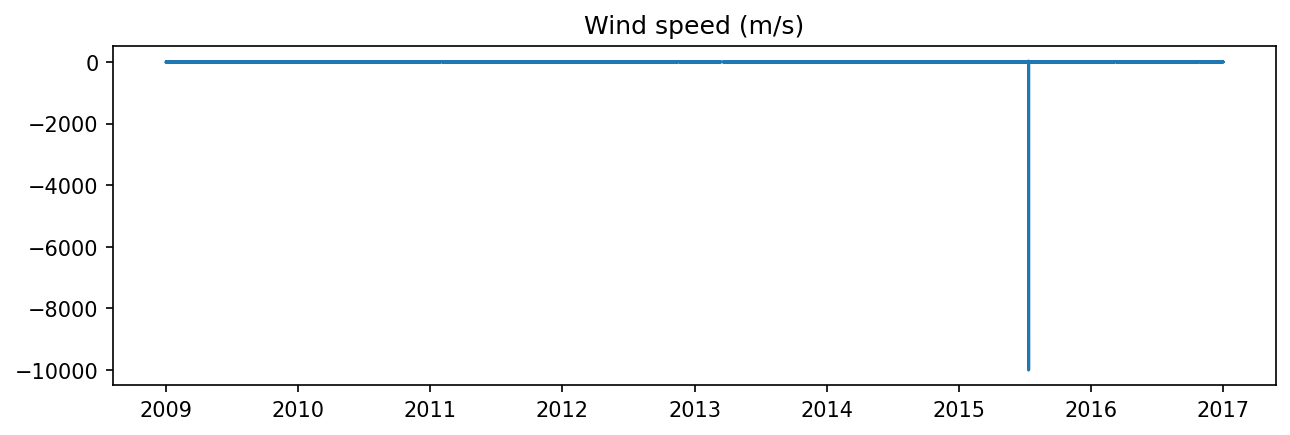

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3), dpi=150)
wv = data['wv (m/s)']
plt.plot(date_time, wv)
plt.title('Wind speed (m/s)')
plt.show()

## Data preprocessing
Wind speed (and maximum wind speed) is set to `-9999.00` for missing entries. Let us fill up the missing entries with the mean.

In [ ]:
wv = data['wv (m/s)']
wv_missing_idx = (wv == -9999.00)
wv_mean = wv[~wv_missing_idx].mean()
wv[wv_missing_idx] = wv_mean

C:\Users\chsuh\AppData\Local\Temp\ipykernel_41920\832945953.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wv[wv_missing_idx] = wv_mean


In [ ]:
max_wv = data['max. wv (m/s)']
missing_idx = (max_wv == -9999.00)
max_wv_mean = max_wv[~missing_idx].mean()
max_wv[missing_idx] = max_wv_mean

C:\Users\chsuh\AppData\Local\Temp\ipykernel_41920\1423667913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_wv[missing_idx] = max_wv_mean


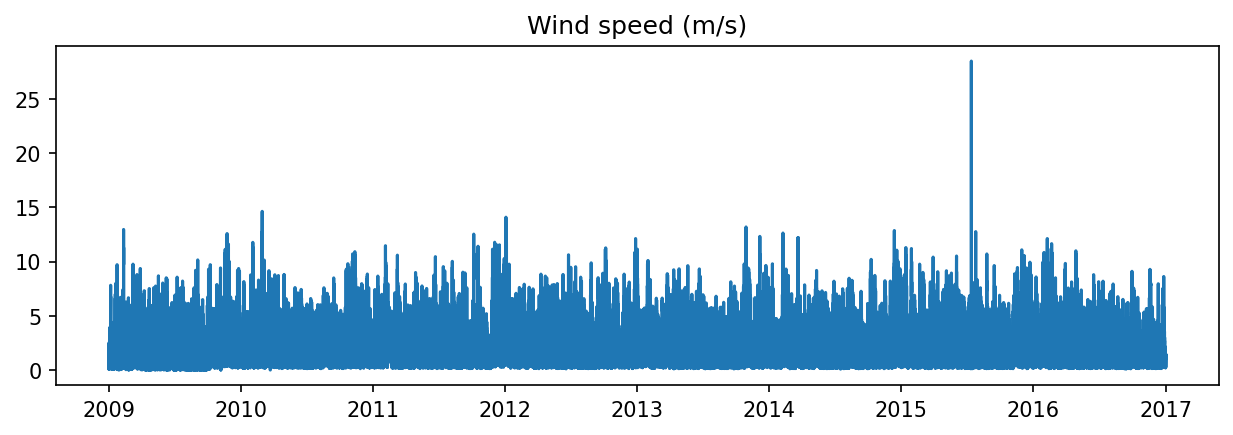

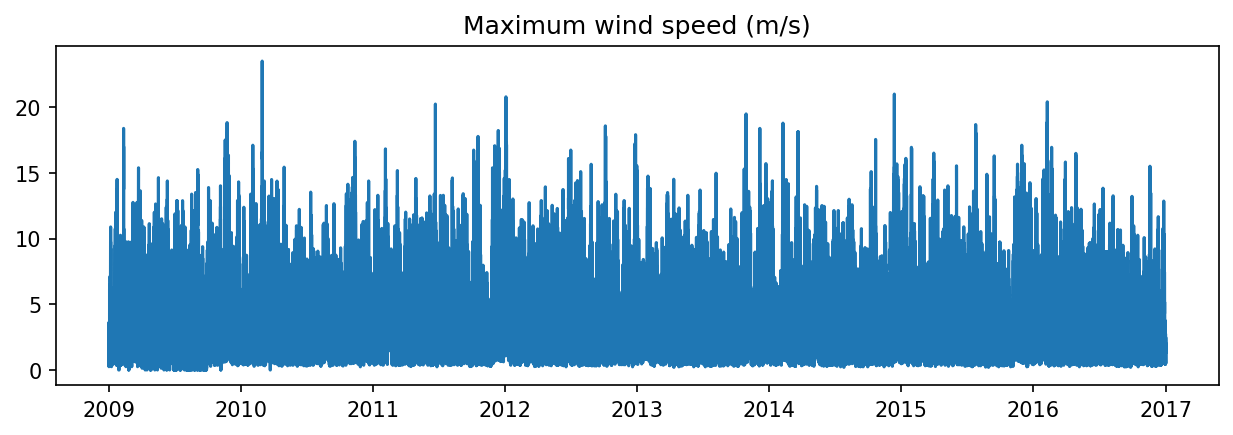

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3), dpi=150)
plt.plot(date_time, wv)
plt.title('Wind speed (m/s)')
plt.show()

plt.figure(figsize=(10,3), dpi=150)
plt.plot(date_time, max_wv)
plt.title('Maximum wind speed (m/s)')
plt.show()

## Check if missing entries are properly filled up

In [ ]:
data.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,2.130282,3.532242,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,1.542271,2.340355,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,0.000000,0.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


## Remove `date_time` column

In [ ]:
data.pop('Date Time')
data

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
